# NLP Project Part 3



# Random forest : Prediction sentiment  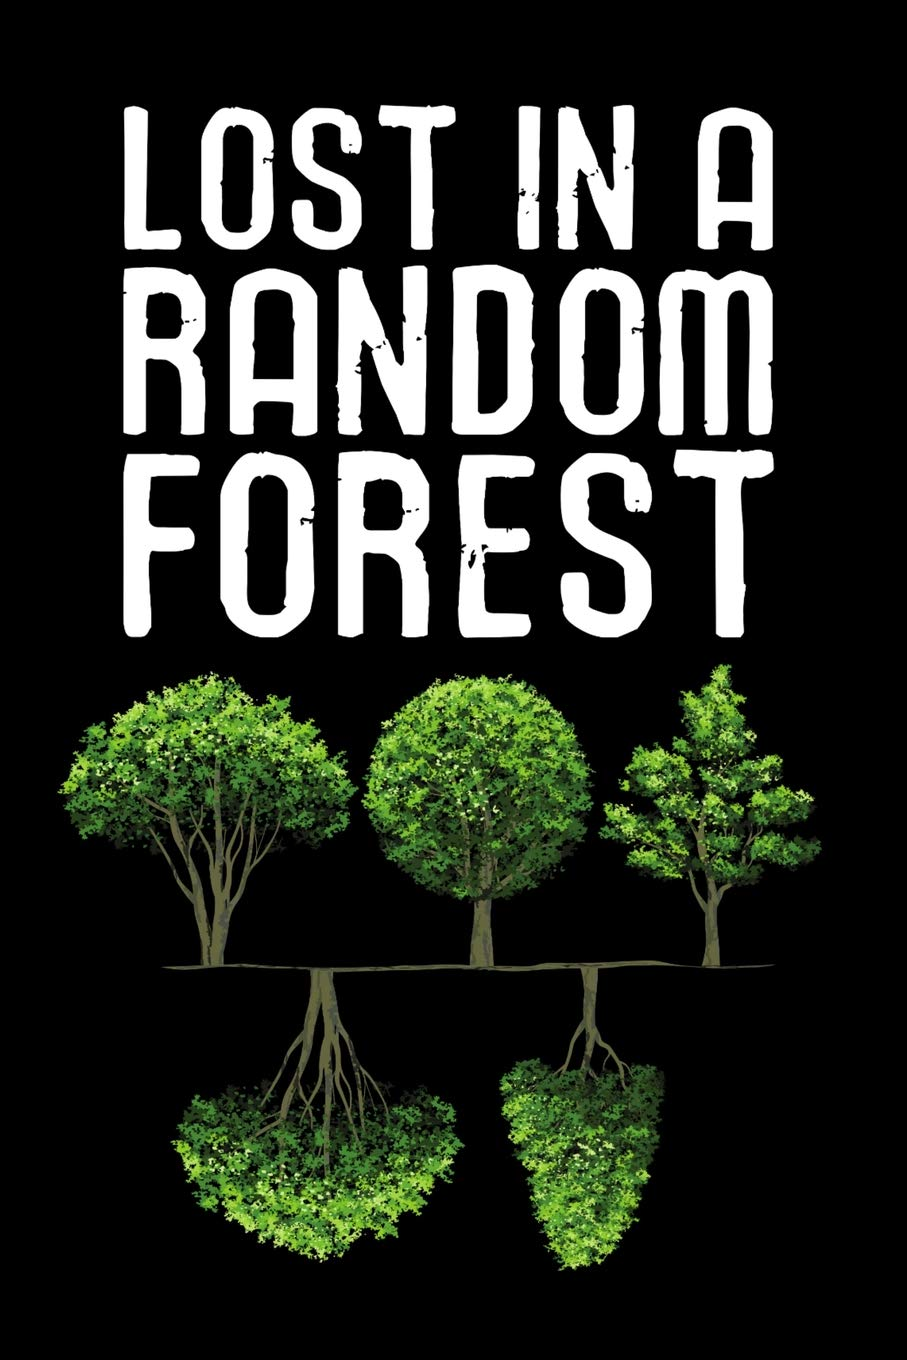


In [ ]:
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import accuracy_score


## Our Data set is not balanced so we have to balance it:
 

In [ ]:
df_neut = df[df['Sentiment']=='neutral']  
df_positve=df[df['Sentiment']=='positive'] 
df_positve=df_positve.sample(1000) 
df_negative=df[df['Sentiment']=='negative'] 
df_neut=df_neut.sample(1000)   

In [ ]:
 df1=pd.concat([df_neut,df_positve,df_negative]) 

In [ ]:
X1=df1.drop(columns=['Sentence','Sentiment','labels'])   
Y1=df1['Sentiment']  

## We estimate a modell : ⛰ : 

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X1,Y1, test_size = 0.2, random_state = 42)

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
model=clf.fit(Xtrain, ytrain)

In [ ]:
ypred=model.predict(Xtest) 

In [ ]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(ytest, ypred))) 

Model accuracy score with 10 decision-trees : 0.3579


So pooor accuracy because :  

1.   We have more than Three class. 
2.   the Avg vectors don't work well with estimations 



# DEEP Learning 
 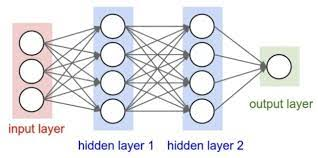

WE Import tools that will need. : 

In [ ]:
#For strings 
import re  
import collections
import matplotlib.pyplot as plt# for plot 
#FOR ESTIMATION 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer # for input tokenzer 
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder #for output code 

from keras import models
from keras import layers
from keras import regularizers

In [ ]:
NB_WORDS = 10000 ##
VAL_SIZE = 200
NB_START_EPOCHS = 25
BATCH_SIZE = 522

In [ ]:
X11=df['Sentence']   
y11=df['Sentiment']


In [ ]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 

In [ ]:
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text) 

In [ ]:
X11 = X11.apply(remove_stopwords).apply(remove_mentions)  

In [ ]:
X11[0:3]

0    The GeoSolutions technology leverage Benefon '...
1           $ESI lows, $1.50 $2.50 BK real possibility
2    For last quarter 2010 Componenta 's net sales ...
Name: Sentence, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X11, y11, test_size=0.1, random_state=37)  

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ") 

In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0])) 

"The GeoSolutions technology leverage Benefon 's GPS solutions providing Location Based Search Technology Communities Platform location relevant multimedia content new powerful commercial model" is converted into [1, 1805, 77, 176, 45, 2386, 3676, 443, 86, 162, 5383, 45]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS): ## to resume the information 
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

In [ ]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq) 

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0])) 

"positive" is converted into 1
"1" is converted into [0. 1. 0.]


In [ ]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (523, 10000)


In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,))) 
base_model.add(layers.Dropout(0.5))
base_model.add(layers.Dense(64, activation='relu')) 
base_model.add(layers.Dropout(0.7)) 
base_model.add(layers.Dense(32, activation='relu')) 
base_model.add(layers.Dropout(0.5)) 
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 3)                

In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [ ]:
base_history = deep_model(base_model) 
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

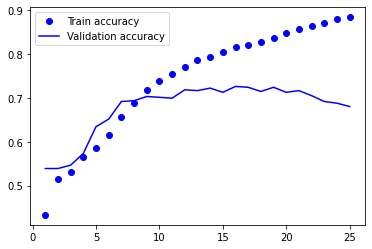

In [ ]:
eval_metric(base_history, 'accuracy') 